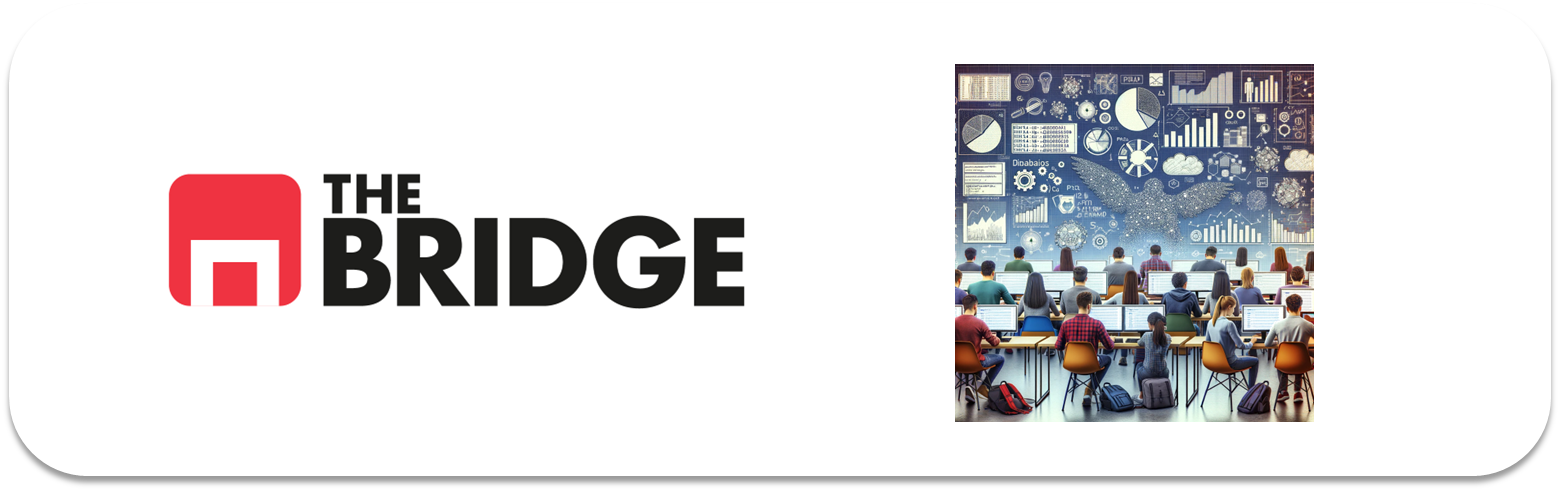

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



_________________________________________

#### 1. Librerías que necesito

In [190]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler


#### 2. Desarrollo

Cargo el dataset

In [154]:
df_casa = pd.read_csv('./data/hard_to_find/obligatoria_hard.csv', sep='|')

In [155]:
# Echo un vistazo al DF

df_casa.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [156]:
df_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Analizo un poco más a fondo cada variable con dos **funciones**.

In [157]:
def describe_df(df):
    '''
    Función devuelve un DataFrame (DF) con información específica del DF original. 
    Esa información será: el tipo de objeto, el % de valores nulos o missings,
    los valores únicos y el % de cardinalidad de cada columna del DF original para tener 

    Argumentos:
    df: DF original sobre el que queremos recibir la información.

    Retorna:
    DF con la información específica.
    '''

    #Creo un diccionario con la columna que va a estar fija
    #Y después añadir las columnas del DF original
    dict_col = {'COL_N': ['DATA_TYPE', 'MISSINGS (%)', 'UNIQUE_VALUES', 'CARDIN (%)']}

    #Fórmula para calcular el porcentaje de nulos
    na_ratio = ((df.isnull().sum() / len(df))*100)

    #Añado al diccionario como clave el nombre de las columnas, y como valores
    #la información del describe
    for col in df:
        dict_col[col] = [df.dtypes[col], na_ratio[col], len(df[col].unique()), round(df[col].nunique()/len(df)*100,2)]

    # Creo el DF.describe
    df_describe = pd.DataFrame(dict_col)

    return df_describe

def tipifica_variables(df, umbral_categoria, umbral_continua):
    '''
    Esta función sirve para poder tipificar las variables de un DF dado.

    Argumentos:
    df: DF original para adquirir las variables que se quiera tificar.
    umbral_categoria: un entero donde corresponda al umbral que queramos asignar a una variable categórica.
    umbral_continua: un float donde corresponda al umbral que queramos asignar a una variable numérica.

    Retorna:
    Un DF con dos columnas 'nombre_varibale' y 'tipo_sugerido', que tendrá tantas filas como columnas haya en el DF original.
    '''

    df_tipificacion = pd.DataFrame({
        'nombre_variable': df.columns
    })

    df_tipificacion['tipo_variable'] = ''

    for i, val in df_tipificacion['nombre_variable'].items():
        card = df[val].nunique()
        porcentaje = (df[val].nunique()/len(df)) * 100

        if card == 2:
            df_tipificacion.at[i,'tipo_variable'] = 'Binaria'
        
        elif card < umbral_categoria:

            df_tipificacion.at[i,'tipo_variable'] = 'Categórica'
    
        else:
            if porcentaje > umbral_continua:
                df_tipificacion.at[i, 'tipo_variable'] = 'Numérica Continua'
            else:
                df_tipificacion.at[i, 'tipo_variable'] = 'Numérica Discreta'
    
    return df_tipificacion

    


In [158]:
describe_df(df_casa)

,COL_N,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UNIQUE_VALUES,504,26,76,2,81,446,356,412,9,66,46,455,229
3,CARDIN (%),99.6,5.14,15.02,0.4,16.01,88.14,70.36,81.42,1.78,13.04,9.09,89.92,45.26


In [159]:
tipifica_variables(df_casa, 10, 20)

,nombre_variable,tipo_variable
0,CRIM,Numérica Continua
1,ZN,Numérica Discreta
2,INDUS,Numérica Discreta
3,CHAS,Binaria
4,NOX,Numérica Discreta
5,RM,Numérica Continua
6,AGE,Numérica Continua
7,DIS,Numérica Continua
8,RAD,Categórica
9,TAX,Numérica Discreta


Creo una **tabla de clasificación** con las diferentes variables y sus características.

Sabemos que el **problema de negocio** es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston. Por lo tanto:

|Variable|Descripción|Tipo|Feature(F)/Target(T)|Notas|
|--------|-----------|----|--------------------|-----|
|`CRIM`|Tasa de criminalidad per cárpita por ciudad|Numérica continua|F||
|`ZN`|Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados|Numérica Discreta|F||
|`INDUS`|Proporción de acres de negocios no minoristas por ciudad|Numérica Discreta|F||
|`CHAS`|Variable ficticia del río Charles|Binaria|-|= 1 si el sector limita con el río; = 0 en caso contrario|
|`NOX`|Concentración de óxidos de nitrógeno|Numérica Discreta|F|Partes por 10 millones|
|`RM`|Número promedio de habitaciones por vivienda|Numérica Continua|F||
|`AGE`|Proporción de unidades ocupadas por el propiestario construidas antes de 1940|Numérica Continua|F||
|`DIS`|Distancias ponderadas a cinco centros de empleo de Boston|Numérica Continua|F||
|`RAD`|Índice de accesibilidad a autopistas radiales|Categórica|F||
|`TAX`|Tasa de impuesto sobre la propiedad|Numérica Discreta|F|De valor total por $10,000|
|`PTRATIO`|Relacion alumno-maestro por ciudad|Numérica Discreta|F||
|`LSTAT`|Porcentaje de población de estatus socioeconómico bajo|Numérica Continua|F||
|`MEDV`|Valor medio de las viviendas ocupadas por sus propietarios|Numérica Continua|T|En miles de dólares|

*Conclusiones*:

- Teniendo en cuenta nuestro problema de negocio, podemos concluir que nuestra variable **TARGET** es `MEDV` representando el valor medio de las viviendas.
- Como conocemos nuestra variable objetivo, estamos ante un modelo **SUPERVISADO** y de **REGRESIÓN**

Para poder seleccionar de forma adecuada las variables independientes (**FEATURES**), debemos de realizar un pequeño análisis en relación al TARGET.

Pero, en primer lugar, analicemos nuestra TARGET para ver ante que tipo de regresión nos enfrentamos.

<Axes: xlabel='MEDV', ylabel='Count'>

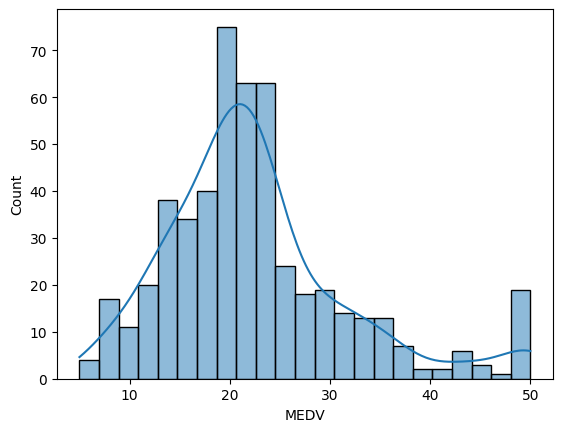

In [160]:
# Creamos la variable TARGET
target = 'MEDV'

# Visualizo la TARGET con un histograma para ver su distribución
sns.histplot(df_casa[target], kde=True)


*Conclusiones*:
- No es una Gaussiana perfecta pero podemos afirmar que los datos están algo normalizados por lo que lo idóneo es aplicar el modelo de **REGRESIÓN LINEAL**

Creo el **TRAIN** y el **TEST** para poder entrenar los datos.

In [161]:
train_set, test_set = train_test_split(df_casa, test_size=0.2, random_state=42)

Antes de seleccionar las FEATURES definitivas, voy a realizar un estudio de **correlaciones** entre ellas y la TARGET.


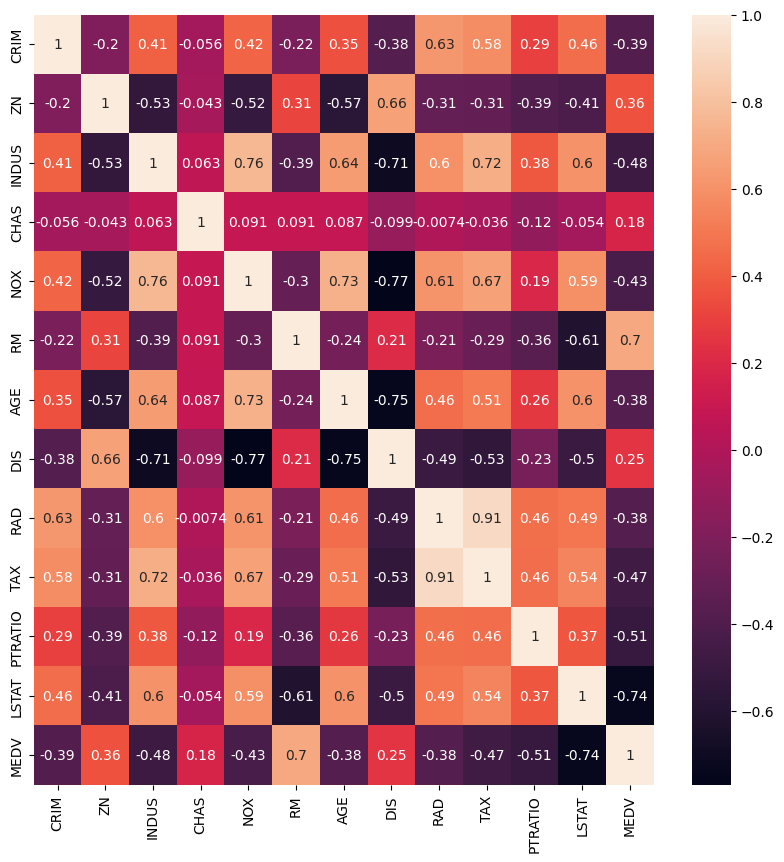

In [162]:
corr = df_casa.corr()

# Lo visualizo con un mapa de calor
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show;

*Conclusiones*:
- Al ver los resultados, vemos que algunas variables no tienen correlación con nuestra TARGET.
- También observamos que la variable `DIS`está correlacionada significativamente con otras vaiables como `ZN`, `INDUS`, `NOX` y `AGE`, por lo que debería ser conveniente eliminarla para no distorsionar los resultados.

Por lo tanto, vamos a filtrar aquellas variables que tienen un bajo índice de correlación y nos quedaremos con aquellas más fuertes.

In [163]:
# Visualizo únicamente las correlacionadas con mi TARGETA para poder hacer el filtro
corr_target = corr[target].sort_values(ascending=False)

In [164]:
# Filtro las columnas más correlacionadas con mi TARGET
columnas = [col for col,valor in corr_target.items() if valor > 0.3 or valor < -0.3]

In [165]:
# Elimino la TARGET de la lista
columnas.remove(target)

In [166]:
columnas

['RM', 'ZN', 'AGE', 'RAD', 'CRIM', 'NOX', 'TAX', 'INDUS', 'PTRATIO', 'LSTAT']

*Conclusiones*
- Por lo tanto, eliminamos: `CHAS`, `DIS`

Por lo tanto creo la variable **FEATURE** para guardar las variables seleccionadas y elimino tanto del TRAIN como del TEST las variables que no vayamos a necesitar

In [167]:
train_set.drop(columns=['CHAS', 'DIS'], inplace=True)
test_set.drop(columns=['CHAS', 'DIS'], inplace=True)


In [168]:
features = columnas


Ahora visualizaremos los histogramas de las FEATURES para ver sus distribuciones y ver si es necesario hacer alguna transformación.

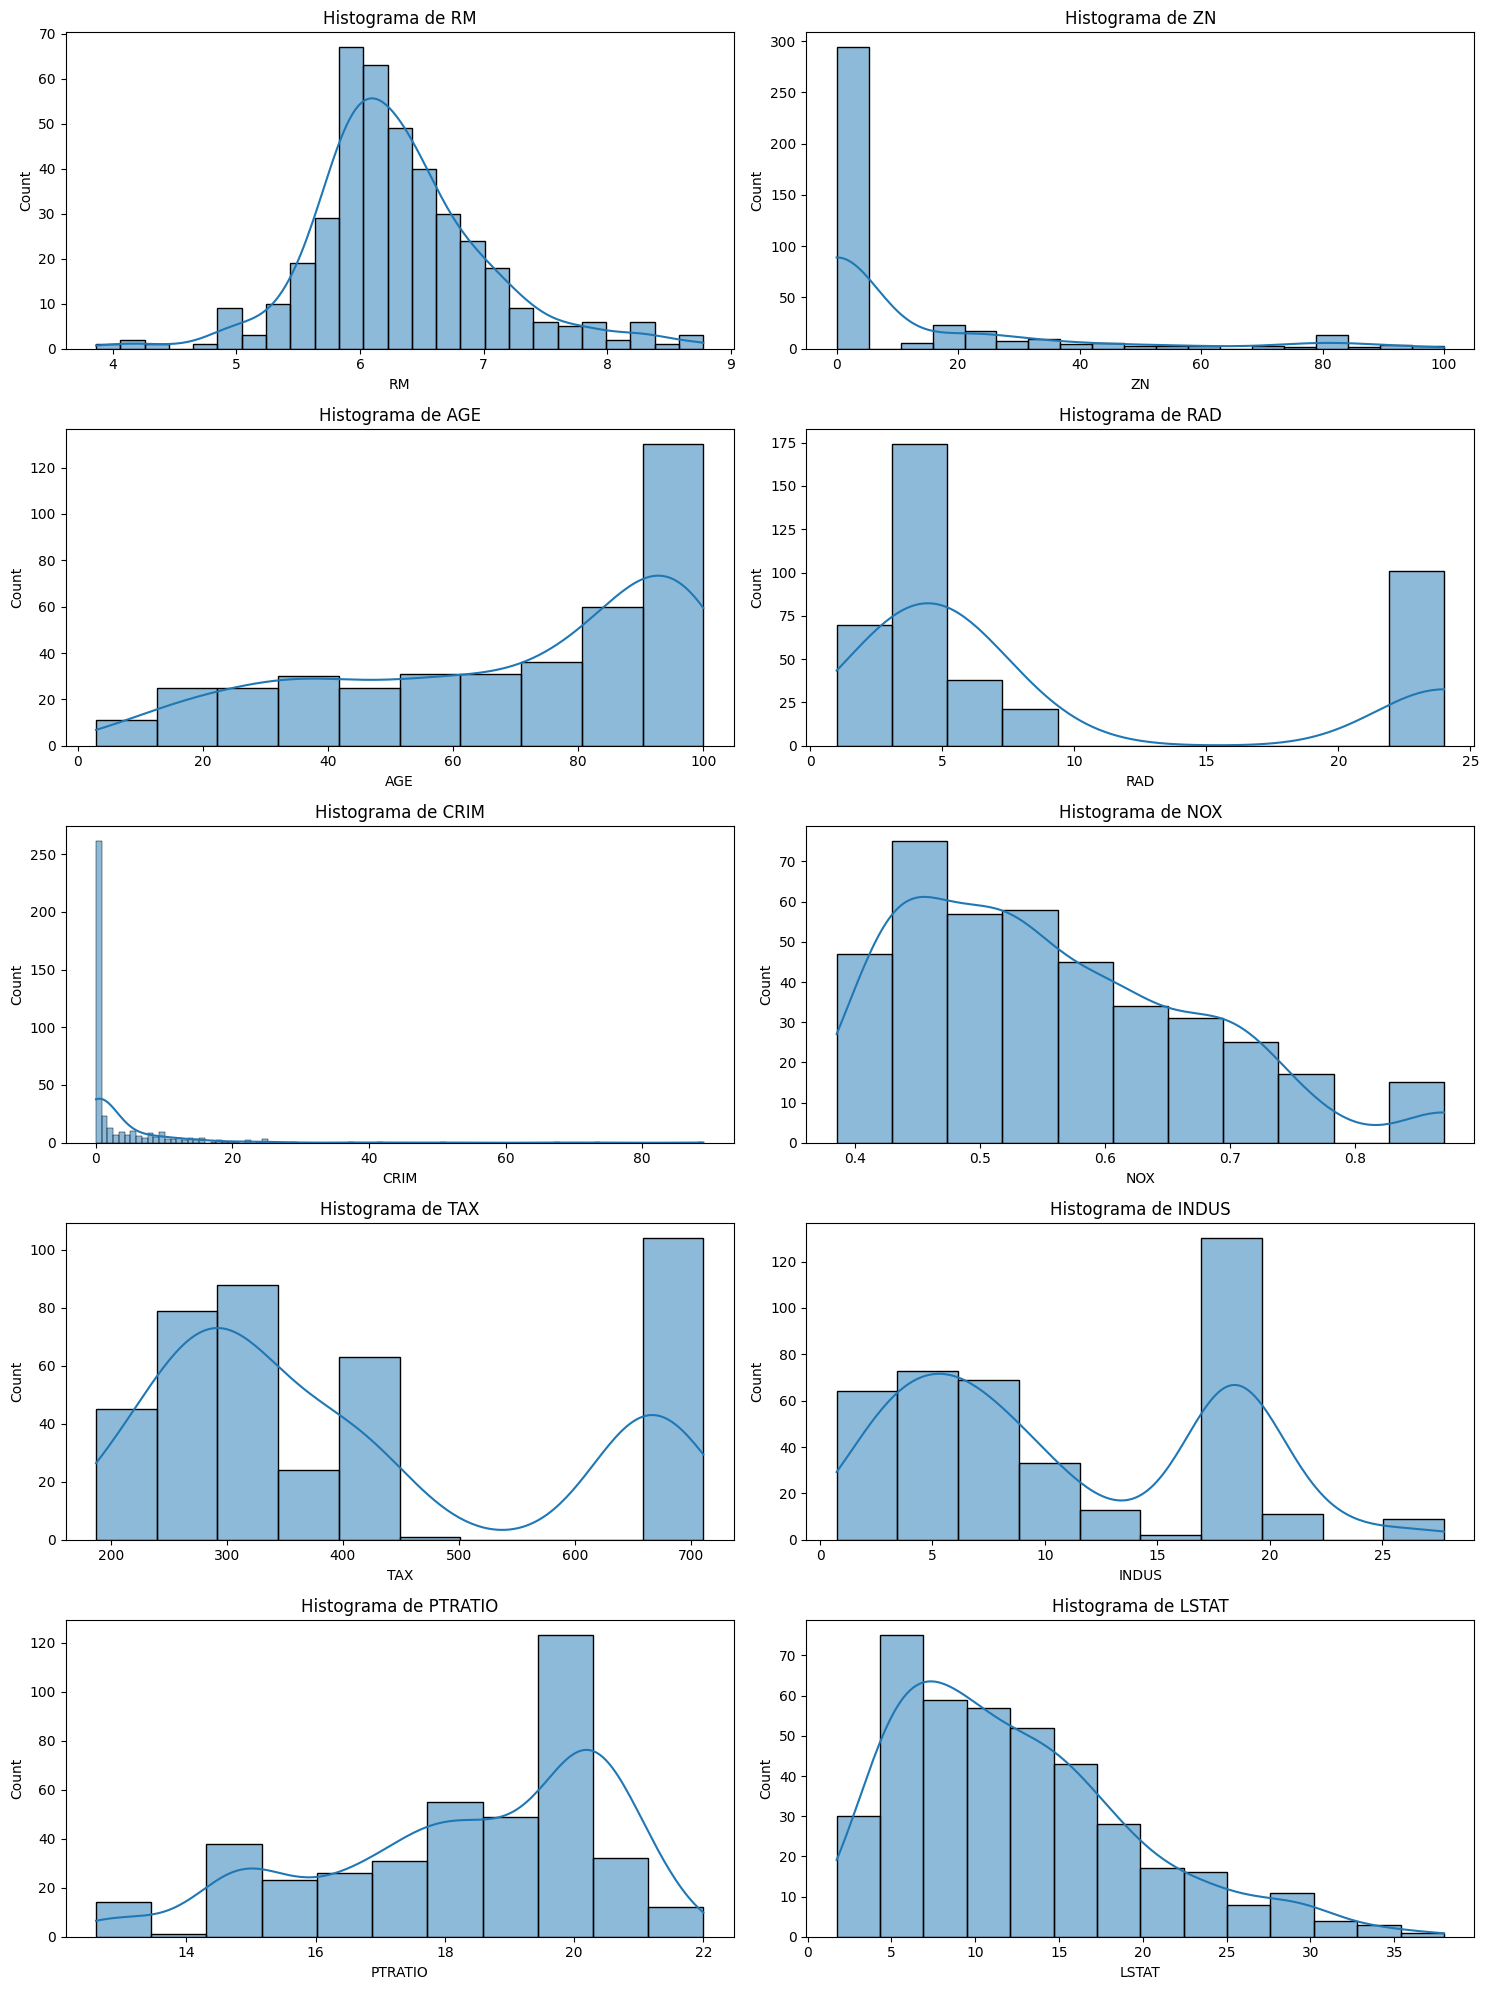

In [169]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))

for i, f in enumerate(features):
    row = i // 2  # Índice de fila para el subplot
    col = i % 2   # Índice de columna para el subplot
    sns.histplot(train_set[f], kde=True, ax=axes[row,col])
    axes[row,col].set_title(f'Histograma de {f}')

plt.tight_layout()
plt.show()

*Conclusiones*:

- Se observa una gran variedad de distribuciones. Los que más me llaman la atención son:
    - `ZN`, `RAD`, `CRIM` y `TAX`

Me gustaría observar si existen outliers en estas variables. Por lo tanto las visualizaré en un BoxPlot

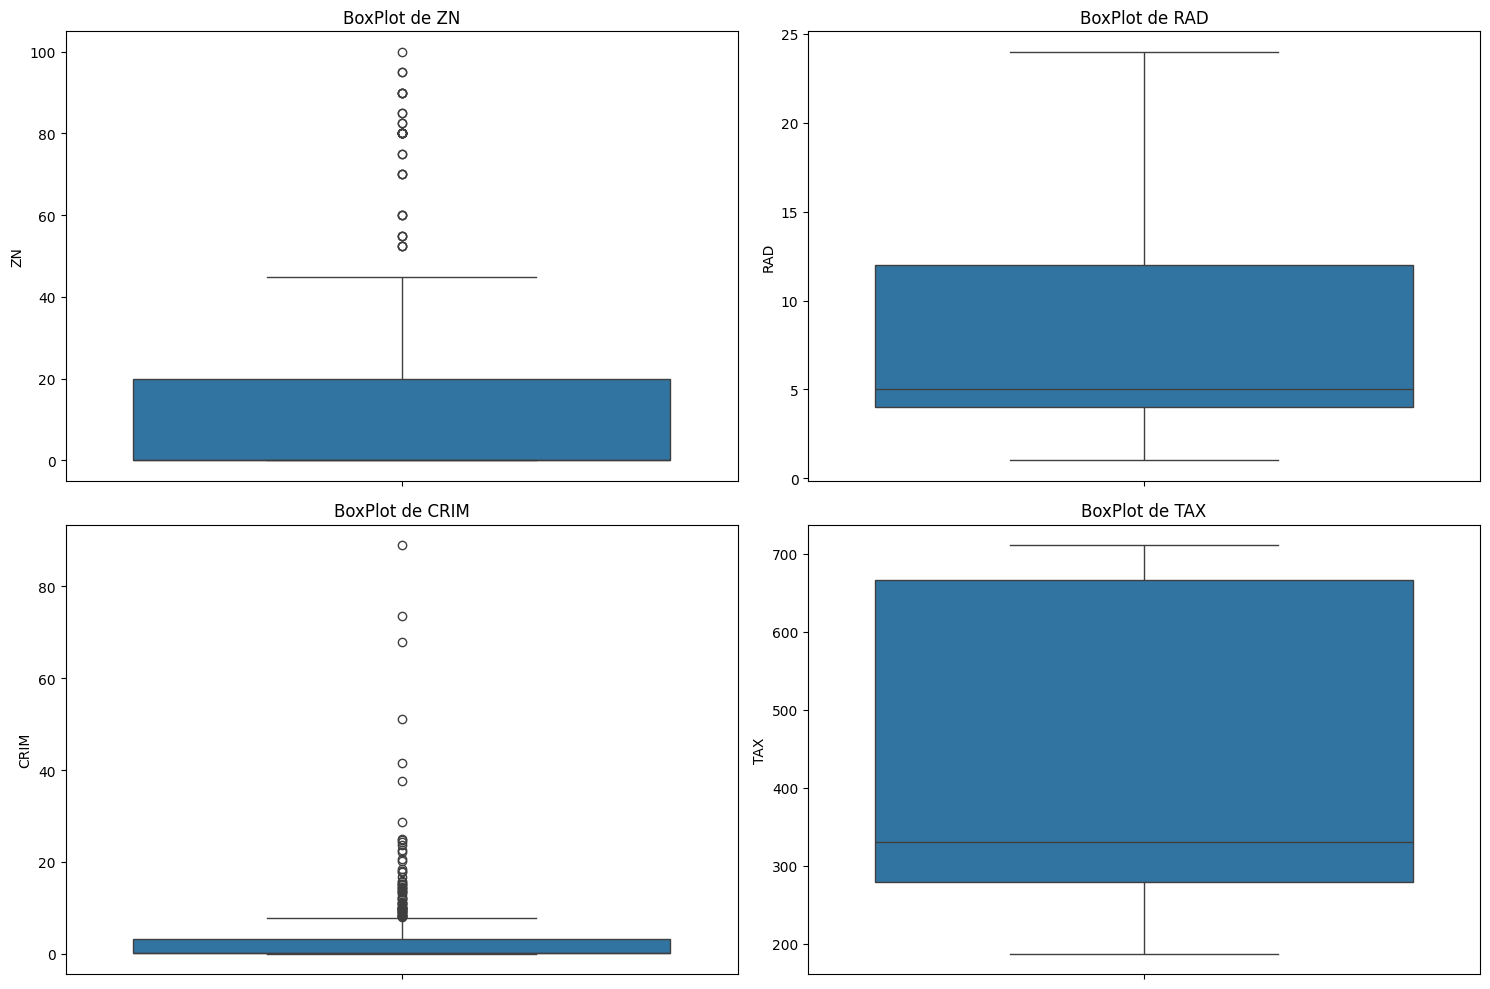

In [170]:
columnas = ['ZN', 'RAD', 'CRIM', 'TAX']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, c in enumerate(columnas):
    row = i // 2   # Índice de fila para el subplot
    col = i % 2  # Índice de columna para el subplot
    sns.boxplot(train_set[c], ax=axes[row, col])
    axes[row, col].set_title(f'BoxPlot de {c}')

# Ajustar el layout
plt.tight_layout()
plt.show()

*Conclusiones*:
- Como hay bastantes outliers en `ZN` y `CRIM`, no se muy bien cómo debo trabajar con ellas por lo que las voy a dejar como están.

Voy a hacer un describe para comparar.


In [171]:
train_set[features].describe()

,RM,ZN,AGE,RAD,CRIM,NOX,TAX,INDUS,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,6.315891,11.569307,68.556436,9.356436,3.609125,0.556484,404.032178,10.985050,18.318317,12.457351
std,0.709452,23.152481,27.994922,8.589721,8.875058,0.117704,166.172655,6.894618,2.228701,7.110381
min,3.863000,0.000000,2.900000,1.000000,0.009060,0.385000,187.000000,0.740000,12.600000,1.730000
25%,5.890500,0.000000,45.550000,4.000000,0.081437,0.452000,279.000000,5.130000,16.800000,6.772500
50%,6.210000,0.000000,77.700000,5.000000,0.261390,0.538000,330.000000,8.560000,18.700000,10.925000
75%,6.636750,20.000000,93.650000,12.000000,3.202962,0.631000,666.000000,18.100000,20.200000,16.372500
max,8.780000,100.000000,100.000000,24.000000,88.976200,0.871000,711.000000,27.740000,22.000000,37.970000


*Conclusiones*:
- Se puede observar que la media en algunos casos hay una gran diferencia.
- Además, gracias al histograma hemos visto que la varianza no es la misma en todos.
- Y, en algunas variables, existen outliers.

Por lo tanto, aplicaremos una estadarización para poder conseguir una media de 0 en todas las variables y una varianza unitaria y, además, es la más adecuada para trabajar con los outliers.

In [172]:
std_scaler = StandardScaler()

#Hago copia por si acaso
train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

In [173]:
train_set[features] = std_scaler.fit_transform(train_set[features])

In [174]:
train_set[features].describe()

,RM,ZN,AGE,RAD,CRIM,NOX,TAX,INDUS,PTRATIO,LSTAT
count,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-2.616169e-16,0.000000,-4.858600e-16,-9.453384e-17,-2.638154e-17,-5.111423e-16,-1.516938e-16,-4.177077e-17,8.519038e-16,-1.791746e-16
std,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-3.461733e+00,-0.500320,-2.348206e+00,-9.740476e-01,-4.061414e-01,-1.458711e+00,-1.307684e+00,-1.487791e+00,-2.568944e+00,-1.510559e+00
25%,-6.003488e-01,-0.500320,-8.228264e-01,-6.243599e-01,-3.979761e-01,-8.887828e-01,-7.533563e-01,-8.502733e-01,-6.821011e-01,-8.005057e-01
50%,-1.494427e-01,-0.500320,3.270201e-01,-5.077973e-01,-3.776748e-01,-1.572334e-01,-4.460660e-01,-3.521669e-01,1.714705e-01,-2.157763e-01
75%,4.528240e-01,0.364589,8.974727e-01,3.081406e-01,-4.582119e-02,6.338607e-01,1.578434e+00,1.033237e+00,8.453428e-01,5.513070e-01
max,3.477564e+00,3.824227,1.124581e+00,1.706891e+00,9.630689e+00,2.675394e+00,1.849573e+00,2.433163e+00,1.653990e+00,3.592534e+00


In [175]:
# Estadarizo en el TEST

test_set[features] = std_scaler.fit_transform(test_set[features])

Una vez hechas las transformaciones necesarias, es hora de crear el modelo de regresión lineal y entrenarlo.

In [176]:
# Finalmente, ya puedo crear las variables 'X' e 'y' de TRAIN y TEST

X_train = train_set[features]
X_test = test_set[features]

y_train = train_set[target]
y_test = test_set[target]

In [177]:
lr = LinearRegression()

In [178]:
lr.fit(X_train, y_train)

LinearRegression()

Realizo las predicciones y las visualizo en una gráfica tomando como referencia el máximo del máximo de las predicciones y de la `y_test`

In [185]:
pred_test= lr.predict(X_test)
pred_train = lr.predict(X_train)

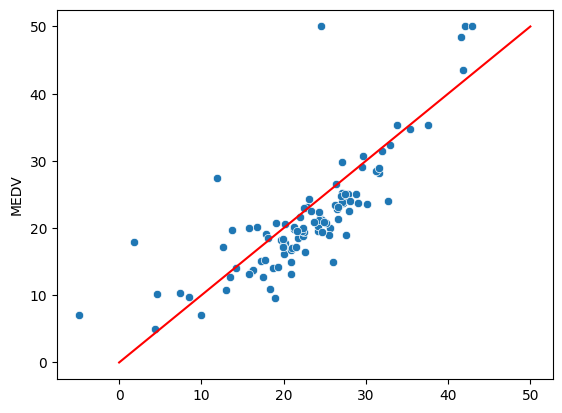

In [186]:
max_val = max(max(pred_test), max(y_test))

sns.scatterplot(x=pred_test, y=y_test)
plt.plot([0, max_val],[0, max_val],'red')
plt.show()

*Conclusiones*:

- Se ve claramente la concentración de valores junto a la linea, por lo que se ve la REGRESIÓN LINEAL, aunque hay algunos valores dispersos.

A continuación, las voy a evaluar con **MAE**, **RMSE**, **MSE** y **$R^2$** comparándola con los valores del TEST

In [191]:
mae_train = mean_absolute_error(y_train, pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
mse_train = mean_squared_error(y_train, pred_train)
r2_train = lr.score(X_train,y_train)

mae_test = mean_absolute_error(y_test, pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
mse_test = mean_squared_error(y_test, pred_test)
r2_test = lr.score(X_test,y_test)

print('MAE train', round(mae_train, 2))
print('MAE test', round(mae_test, 2))

print('\nRMSE train', round(rmse_train, 2))
print('RMSE test', round(rmse_test, 2))

print('\nMSE train', round(mse_train, 2))
print('MSE test', round(mse_test, 2))

print('\nR2 train', round(r2_train, 2))
print('R2 test', round(r2_test, 2))

MAE train 3.6
MAE test 3.91

RMSE train 5.06
RMSE test 5.33

MSE train 25.57
MSE test 28.44

R2 train 0.71
R2 test 0.61


*EVALUACIÓN DE LA GENERABILIDAD*

Los resultados indican que el modelo tiene un buen rendimiento, con un equilibrio adecuado entre el error en los datos de entrenamiento y prueba. Las métricas sugieren que el modelo es capaz de generalizar razonablemente bien a nuevos datos ya que la diferencia entre el error de los datos de entrenamiento y de prueba es muy pequeña.

Dados a mis conocimientos que tengo ahora, no aplicaría ningún modelo de regularización ya que no existe overfitting. 

Cabe la posibilidad de que la causa de estos resultados sea porque haya algo erróneo, pero lo desconozco.


--> Como en el ejercicio me exige aplicar un modelo de regularización asignando hiperparámetros, lo voy a realizar sobre el MSE que es donde hay más diferencias de las cuatro métricas.

Por lo que aplicaré el modelo **RIDGE**

In [193]:
ridgeR = Ridge(alpha = 10)
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(mse_train,2))
print("Test MSE sin regularización:", round(mse_test,2))

print("\nTrain MSE:", round(mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 25.57
Test MSE sin regularización: 28.44

Train MSE: 25.64
Test MSE: 28.64


In [194]:
ridgeR = Ridge(alpha = 5)
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(mse_train,2))
print("Test MSE sin regularización:", round(mse_test,2))

print("\nTrain MSE:", round(mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 25.57
Test MSE sin regularización: 28.44

Train MSE: 25.59
Test MSE: 28.57


In [195]:
ridgeR = Ridge(alpha = 15)
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(mse_train,2))
print("Test MSE sin regularización:", round(mse_test,2))

print("\nTrain MSE:", round(mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 25.57
Test MSE sin regularización: 28.44

Train MSE: 25.7
Test MSE: 28.69
